In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import math

## 1. 기초 통계의 대표값
* 평균(mean)
* 중앙값(median)
* 최빈값(mode)

### (1) 평균(mean) $ \mu $
* 모든 값의 총합을 값의 개수로 나눈 값
* 극단적인 값(이상값/아웃라이어)이 있는 경우 평균에 영향을 미침
* 모집단의 평균 $ \mu $
* 표본집단의 평균 $ \bar {x} $
* $$ 모평균 : \mu = {\sum_{i=1}^N x_i \over N} $$
* $$ 표본평균 : \bar {x} = {\sum_{i=1}^N x_i \over n} $$

In [7]:
a = pd.DataFrame([2,3,4,5,3,5,6,7,8,10], columns=['표본'])
a

,표본
0,2
1,3
2,4
3,5
4,3
5,5
6,6
7,7
8,8
9,10


In [4]:
a.mean()

0    5.3
dtype: float64

### (2) 중앙값(median)
* 모든 데이터를 큰 순서대로 나열할 때 가운데 있는 값
* 데이터의 개수가 홀수일 때는 정중앙의 값
* 데이터의 개수가 짝수일 때는 정중앙 2개의 수의 평균값
* 이상치가 있어도 영향을 받지 않음

In [8]:
a.T

,0,1,2,3,4,5,6,7,8,9
표본,2,3,4,5,3,5,6,7,8,10


In [9]:
a.median()

표본    5.0
dtype: float64

### (3) 최빈값(mode)
* 표본에서 가장 많이 등장하는 값
* 최빈값도 극단값에 영향을 받지 않음

In [10]:
a.T

,0,1,2,3,4,5,6,7,8,9
표본,2,3,4,5,3,5,6,7,8,10


In [14]:
a.mode()

,표본
0,3
1,5


### (4) 산술평균/기하평균
* 산술평균(덧셈의 평균) : 모든 데이터의 합계 / 데이터 수
* 기하평균(곱셈의 평균) : 모든 데이터의 곱의 n제곱근 - 증가율의 평균을 계산할 때 사용

In [15]:
a.T

,0,1,2,3,4,5,6,7,8,9
표본,2,3,4,5,3,5,6,7,8,10


In [16]:
# 산술평균
a.mean()

표본    5.3
dtype: float64

In [17]:
# 기하평균
from scipy.stats import gmean
geometric_mean = gmean(a['표본'])
geometric_mean

np.float64(4.766078358486367)

* 2020년에 7%, 2021년에 35%, 2022년에 40%, 2023년에 69%의 매출 증가가 있었다면 4년간 평균 매출 증가율은?

In [18]:
print('산술평균 :', pd.Series([7,35,40,69]).mean())
print('기하평균 :', gmean([7,35,40,69]))

산술평균 : 37.75
기하평균 : 28.67601451933219


## 2. 도수 분포표와 히스토그램
### (1) 도수분포표(histogram 그래프)
* 주어진 데이터를 일정한 범위로 나누고 그 범위에 출현하는 데이터 개수를 조사해 나타낸 표
* 데이터의 구간 폭을 '계급(class)'
* 각 계급에 속하는 데이터의 개수 '도수'
* 각 계급의 중앙값을 '계급값'
* 도수분포표에서 도수가 큰 것을 '출현 횟수가 많다'고 하고
* 가장 도수가 큰 계급의 계급값을 '최빈값'이라고 함

In [19]:
data = pd.read_csv('https://raw.githubusercontent.com/haram4th/ablearn/main/Taitanic_train.csv')
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [21]:
age = data[['Age']]
age

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [22]:
# value_counts로 도수분포표 만들기
age.value_counts()

Age 
24.0    30
22.0    27
18.0    26
19.0    25
30.0    25
        ..
53.0     1
66.0     1
70.5     1
74.0     1
80.0     1
Name: count, Length: 88, dtype: int64

In [24]:
# 계급 구간을 10단위로 계급을 나누어 도수분포표를 만들고
# 도수분포표(Frequency Distribution Table)를 시각화한 히스토그램 그래프 그리기
bins = (0, 10, 20, 30, 40, 50, 60, 70, 80, 90)
labels = ('under10s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s')
age_FDT = pd.cut(age['Age'].values, bins=bins, labels=labels, right=False)
print(age_FDT.value_counts())

under10s     62
10s         102
20s         220
30s         167
40s          89
50s          48
60s          19
70s           6
80s           1
Name: count, dtype: int64


<Axes: >

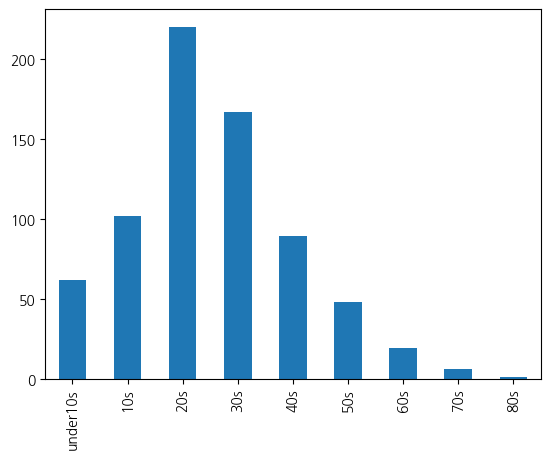

In [29]:
age_FDT.value_counts().plot(kind='bar')

### (2) 상대도수분포표(Relative Frequency Distribution Table)
* 상대도수 : 계급의 도수 / 전체 도수의 합계, 어떤 계급의 도수가 전체 도수에서 몇 %를 차지하는지 나타내는 값
* 상대도수분포표 : 모든 계급의 상대도수를 구해서 더한 것

In [34]:
fdt_df = pd.DataFrame(age_FDT.value_counts())
fdt_df

,count
under10s,62
10s,102
20s,220
30s,167
40s,89
50s,48
60s,19
70s,6
80s,1


In [35]:
# 상대도수분포표 만들기
# 상대도수 : 계급의 도수 / 전체 도수의 합계

In [39]:
fdt_df['rfdt'] = (fdt_df['count'] / fdt_df['count'].sum()).round(3) * 100
fdt_df

,count,rfdt
under10s,62,8.7
10s,102,14.3
20s,220,30.8
30s,167,23.4
40s,89,12.5
50s,48,6.7
60s,19,2.7
70s,6,0.8
80s,1,0.1


### 구간화가 필요한 데이터에서 계급의 개수는 몇 개로?
* 스터지스 공식 : 도수분포표나 히스토그램을 만들 때 계급의 수가 적당한지 판단하는 공식
* 전체 데이터 개수를 $ 2^n $이라 하고, 그때 계급 수를 n+1로 함

In [45]:
round(math.log2(len(age))) + 1

11

### 3) 편차(deviation)
* 데이터와 평균이 떨어진 거리, 데이터와 평균값과의 차이
* 데이터 - 평균값

In [47]:
a['평균'] = a['표본'].mean()

In [48]:
a['편차'] = a['표본'] - a['평균']

In [49]:
a

,표본,평균,편차
0,2,5.3,-3.3
1,3,5.3,-2.3
2,4,5.3,-1.3
3,5,5.3,-0.3
4,3,5.3,-2.3
5,5,5.3,-0.3
6,6,5.3,0.7
7,7,5.3,1.7
8,8,5.3,2.7
9,10,5.3,4.7


In [50]:
# 전체 데이터의 편차의 합
a['편차'].sum()

np.float64(1.7763568394002505e-15)

## 4) 분산 (variance)
* 편차 제곱의 합 / 데이터 수
* 평균으로부터 떨어진 정도가 잘 보일 수 있도록 고안된 지표
* 편차의 합은 양수와 음수가 합쳐져서 0이 되기 때문에 각 데이터가 평균으로부터 얼마나 떨어져 있는지 알 수 없어서 편차 제곱의 합인 분산을 사용함
* 모분산 : $ \sigma^2 $
$$ \sigma^2 = {\sum(x_i-\mu)^2 \over N} $$
* 표본분산 : $ s^2 $
$$ s^2 = {\sum(x_i-\bar{x})^2 \over n-1} $$

In [51]:
a['편차제곱'] = a['편차']**2
a['모분산'] = a['편차제곱'].sum() / len(a['편차제곱'])
a

,표본,평균,편차,편차제곱,모분산
0,2,5.3,-3.3,10.89,5.61
1,3,5.3,-2.3,5.29,5.61
2,4,5.3,-1.3,1.69,5.61
3,5,5.3,-0.3,0.09,5.61
4,3,5.3,-2.3,5.29,5.61
5,5,5.3,-0.3,0.09,5.61
6,6,5.3,0.7,0.49,5.61
7,7,5.3,1.7,2.89,5.61
8,8,5.3,2.7,7.29,5.61
9,10,5.3,4.7,22.09,5.61


In [52]:
# 표본분산
a['표본'].var()

np.float64(6.233333333333333)